In [85]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [86]:
# Hyperparameters
learning_rate = 0.1
epochs = 100

In [87]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# Convert to 784x1 vector
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

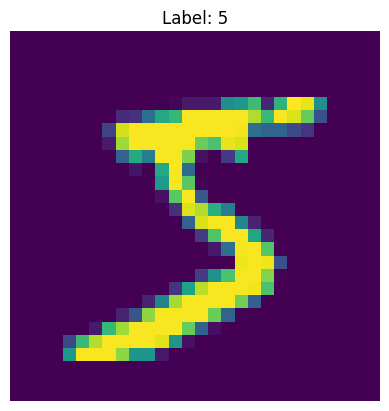

In [88]:

plt.imshow(x_train[0])
plt.title(f'Label: {y_train[0]}')
plt.axis('off')  # Turn off the axis labels
plt.show()

In [89]:
def init_params(input_size, output_size):
    np.random.seed(69)
    W = (np.random.rand(output_size, input_size) - 0.5) * 0.01
    B = np.ones((output_size, 1)) * 0.1

    return W, B

In [90]:
# Output activation function
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

In [91]:
# One hot the Y values [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
def one_hot(labels, num_classes):
    # Array of zeroes
    one_hot_encoded = np.zeros((labels.size, num_classes))
    # Place the 1 in its corresponding place
    one_hot_encoded[np.arange(labels.size), labels] = 1
    return one_hot_encoded

In [92]:
# Cross-Entropy Loss
def loss(Y, A):
    m = Y.shape[0]
    epsilon = 1e-10
    log_likelihood = -np.log(A[np.arange(m), Y.argmax(axis=1)] + epsilon)
    return np.mean(log_likelihood)


In [93]:
def forw_pass(X, W, B):
    Z = np.dot(X, W.T) + B.T
    A = sigmoid(Z)
    
    return Z, A


In [94]:
def back_pass(X, Y, A):
    m = X.shape[0]
    dZ = A - Y #dL/dZ Simplification for the Cross-Entropy gradient (Output probability - Expected probability)
    dW = np.dot(dZ.T, X) / m
    dB = np.sum(dZ, axis=0, keepdims=True).T / m
    return dW, dB

In [95]:
def update_params(W, B, dW, dB, learning_rate):
    W -= learning_rate * dW
    B -= learning_rate * dB
    return W, B

In [96]:
W, B = init_params(784, 10)

Y_train_encoded = one_hot(Y_train, 10)
Y_test_encoded = one_hot(Y_test, 10)

In [98]:
for epoch in range(epochs):
    Z, A = forw_pass(X_train_flattened, W, B)
    cost = loss(Y_train_encoded, A)
    dW, dB = back_pass(X_train_flattened, Y_train_encoded,A)
    W, B = update_params(W, B, dW, dB, learning_rate)
    if (epoch % 10 == 0):
        print(f'Epoch {epoch+1}, Cost: {cost}')

    # Evaluation on test data
Z_test, A_test = forw_pass(X_test_flattened, W, B)
test_loss = loss(Y_test_encoded, A_test)
print(f'Test Loss: {test_loss}')

C:\Users\Marco\AppData\Local\Temp\ipykernel_22828\70635953.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-Z))


Epoch 1, Cost: 6.914360757664101
Epoch 11, Cost: 5.311263945582696
Epoch 21, Cost: 5.332309558456861
Epoch 31, Cost: 5.172273123620499
Epoch 41, Cost: 5.021147726457494
Epoch 51, Cost: 5.000676572436242
Epoch 61, Cost: 6.039928873475018
Epoch 71, Cost: 6.385588288125648
Epoch 81, Cost: 4.989078884700363
Epoch 91, Cost: 4.158272364667778
Test Loss: 3.5633918090408834


C:\Users\Marco\AppData\Local\Temp\ipykernel_22828\70635953.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-Z))


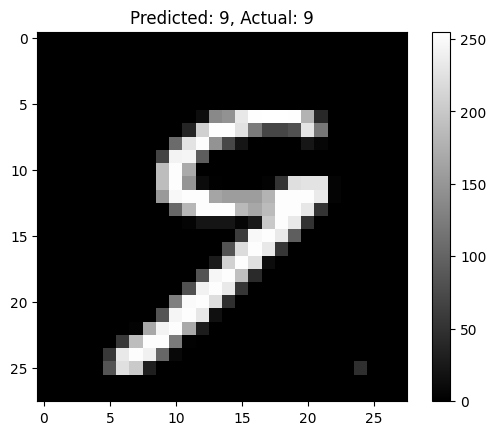

In [133]:
index = np.random.randint(0, X_test.shape[0])  # Random index
image = X_test_flattened[index]  # Select the image
image_reshaped = image.reshape(28, 28)  # Reshape for display

# Predict the label
prediction = forw_pass(image.reshape(1, -1), W, B)
predicted_label = np.argmax(prediction)

# Visualize the image and prediction
plt.imshow(image_reshaped, cmap='gray')  # Display the image
plt.title(f'Predicted: {predicted_label}, Actual: {Y_test[index]}')
plt.colorbar()
plt.show()